## BCycle Starter Code

In the following notebook, we have provided several examples of types of exploratory analysis we would do on these datasets. They are by no means exhaustive, but it should provide with code to do similar/further work!

## Getting the data from Blob Storage
Our data is stored inside of Azure Blob Storage. Following is the code to get it to your notebook.

In [60]:
# If you are running this code on your own computer, uncomment the following line.
# !pip install azure


In [61]:
from azure.storage.blob import BlockBlobService
import os


In [62]:
# You should only run this code once.
!mkdir bcycle


mkdir: cannot create directory ‘bcycle’: File exists


In [63]:
local_path=os.getcwd() + "/bcycle" # Where the data will be stored.
blob_account_name = "mldsdatahack2019diag" # Don't edit!
blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # Don't edit!

mycontainer = "datahackdata2019"       # Don't edit!

In [64]:
import azure
from azure.storage.blob import BlockBlobService

# Create a client to get data
blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
# Get the data
blob_service.get_blob_to_path("datahackdata2019", "BCycleAustin.csv", os.path.join(local_path, "BCycleAustin.csv"))


## Load Data

In [66]:
# Yo should see BCycleAustin.csv
!ls bcycle


BCycleAustin.csv


In [67]:
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
# Read in data
df = pd.read_csv('bcycle/BCycleAustin.csv')


In [92]:
# See the first few rows.
df.head()


Trip ID                 Membership Type  Bicycle ID  Checkout Kiosk ID  \
0  9900285854    Annual (San Antonio B-cycle)       207.0             2537.0   
1  9900288020  24-Hour Kiosk (Austin B-cycle)       190.0             2537.0   
2  9900289011                        Local365       190.0             2537.0   
3  9900292552                         Walk Up       354.0             2537.0   
4  9900293709                        Local365        20.0             2537.0   

   Checkout Kiosk  Return Kiosk ID          Return Kiosk  \
0  West & 6th St.           2707.0  Rainey St @ Cummings   
1  West & 6th St.           2707.0  Rainey St @ Cummings   
2  West & 6th St.           2707.0  Rainey St @ Cummings   
3  West & 6th St.           2707.0  Rainey St @ Cummings   
4  West & 6th St.           2707.0  Rainey St @ Cummings   

   Trip Duration Minutes   Checkout DateTime  Checkout Latitude  \
0                     76 2014-10-26 13:12:00           30.27041   
1                     12 2014-10-30 19:12:00           30.27041   
2                      9 2015-10-01 19:12:27           30.27041   
3                     14 2015-10-04 13:12:41           30.27041   
4                     11 2015-10-04 13:12:56           30.27041   

   Checkout Longitude  Return Latitude  Return Longitude Checkout YR-MO  
0           -97.75046         30.25579         -97.73982     2014-10-01  
1           -97.75046         30.25579         -97.73982     2014-10-01  
2           -97.75046         30.25579         -97.73982     2015-10-01  
3           -97.75046         30.25579         -97.73982     2015-10-01  
4           -97.75046         30.25579         -97.73982     2015-10-01

In [36]:
print(df)


            Trip ID                     Membership Type  Bicycle ID  \
0        9900285854        Annual (San Antonio B-cycle)       207.0   
1        9900288020      24-Hour Kiosk (Austin B-cycle)       190.0   
2        9900289011                            Local365       190.0   
3        9900292552                             Walk Up       354.0   
4        9900293709                            Local365        20.0   
5        9900294584                            Local365       133.0   
6        9900295170                            Local365       134.0   
7        9900296123                            Local365       232.0   
8        9900297717                            Local365       439.0   
9        9900302356                            Local365        95.0   
10       9900303278                            Local365       182.0   
11       9900303768                            Local365       287.0   
12       9900304300                            Local365       559.0   
13    

## BCycle Popular Locations and Times

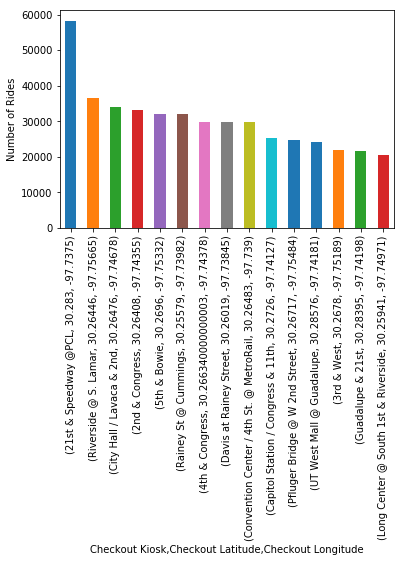

In [44]:
igroup = df.groupby(['Checkout Kiosk', 'Checkout Latitude', 'Checkout Longitude']).count()['Trip ID'].sort_values(ascending=False)
igroup = igroup.iloc[0:15]
igroup.plot('bar')
plt.ylabel('Number of Rides')
plt.show()

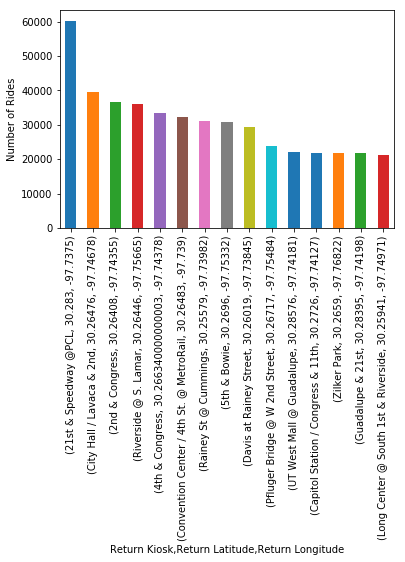

In [45]:
ogroup = df.groupby(['Return Kiosk', 'Return Latitude', 'Return Longitude']).count()['Trip ID'].sort_values(ascending=False)
ogroup = ogroup.iloc[0:15]
ogroup.plot('bar')
plt.ylabel('Number of Rides')
plt.show()

In [46]:
sumLong = 0
sumLat = 0

for i in range(len(igroup)):
    sumLong=sumLong + igroup.index[i][1]
    sumLat=sumLat + igroup.index[i][2]

meanLong = sumLong/len(igroup)
meanLat = sumLat/len(igroup)

m1 = folium.Map(
    location=[meanLong,meanLat],
    zoom_start=14,
)

for i in range(len(igroup)):
    markerRadius = igroup.values[i] / 1000
    folium.CircleMarker([igroup.index[i][1], igroup.index[i][2]], radius = markerRadius, color='#3186cc',
    fill=True, fill_color='#3186cc', tooltip = igroup.index[i][0]).add_to(m1)
    folium.Circle([igroup.index[i][1], igroup.index[i][2]], radius = 20, color='red',
    fill=True, tooltip = igroup.index[i][0]).add_to(m1)
m1

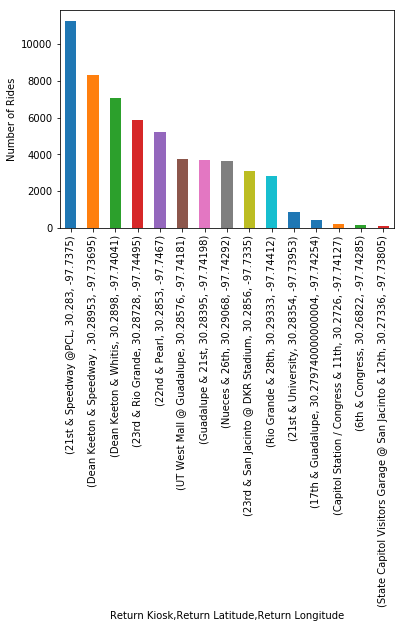

In [47]:
PCLgroup = df_PCL.groupby(['Return Kiosk', 'Return Latitude', 'Return Longitude']).count()['Trip ID'].sort_values(ascending=False)
PCLgroup = PCLgroup.iloc[0:15]
PCLgroup.plot('bar')
plt.ylabel('Number of Rides')
plt.show()


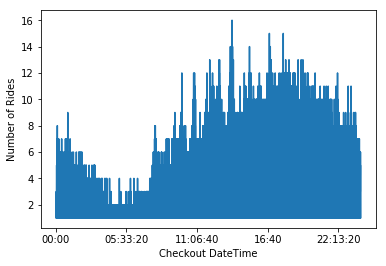

In [42]:
# Convert the checkout datetime from string to an actual date-time object.
df_time = df.copy()
df_time['Checkout DateTime'] = pd.to_datetime(df['Checkout DateTime'])
df_time['Checkout DateTime'] = [d.time() for d in df['Checkout DateTime']]
df_time = df_time.loc[df_time['Membership Type'] == 'U.T. Student Membership']
# All the cycles checked out in the same month are in the same group
tgroups = df_time.groupby(['Checkout DateTime']).count()['Trip ID']
# Number of rides per month
tgroups.plot()
plt.ylabel('Number of Rides')
plt.show()

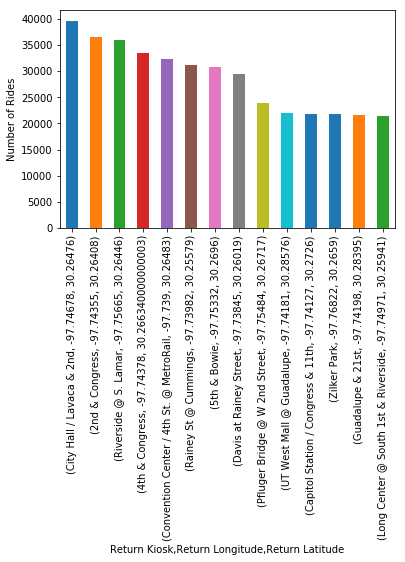

In [38]:
import datetime
datetime_object = datetime.datetime.strptime('05:00', '%H:%M').time()
df_time_d = df_time.loc[df_time['Checkout DateTime'] < datetime_object]
dgroups = df_time.groupby(['Return Kiosk', 'Return Longitude', 'Return Latitude']).count()['Trip ID'].sort_values(ascending = False)
dgroups = dgroups.iloc[1:15]
dgroups.plot('bar')
plt.ylabel('Number of Rides')
plt.show()


In [39]:
sumLong = 0
sumLat = 0

for i in range(len(dgroups)):
    sumLong=sumLong + dgroups.index[i][1]
    sumLat=sumLat + dgroups.index[i][2]

meanLong = sumLong/len(dgroups)
meanLat = sumLat/len(dgroups)

m = folium.Map(
    location=[meanLat,meanLong],
    zoom_start=14,
)

for i in range(len(dgroups)):
    markerRadius = dgroups.values[i] / 1000
    folium.CircleMarker([dgroups.index[i][2], dgroups.index[i][1]], radius = markerRadius, color='#3186cc',
    fill=True, fill_color='#3186cc', tooltip = dgroups.index[i][0]).add_to(m)
    folium.Circle([dgroups.index[i][2], dgroups.index[i][1]], radius = 20, color='red',
    fill=True, tooltip = dgroups.index[i][0]).add_to(m)
m

### Follow Up

From this plot, we can see a large spike in 2018, what factors could have led to this? (e.g. opening up to UT). 

A natural follow-up question then, is how does the individual Kiosk activity change? (left open if interested)

# BCycle Usage After 6pm/18:00 

In [ ]:
# Convert the checkout datetime from string to an actual date-time object.
df['Checkout DateTime'] = pd.to_datetime(df['Checkout DateTime'])


In [ ]:
# extract year-month to bin for plot
df['Checkout YR-MO'] = pd.to_datetime(df['Checkout DateTime'].apply(lambda x :
                                                      str(x.year) + '-' + str(x.month)))

In [ ]:
# All the cycles checked out in the same month are in the same group
groups = df.groupby(['Checkout YR-MO']).count()

In [ ]:
# See first few columns
groups.head()

In [ ]:
groups = groups['Trip ID']
groups.head()

In [ ]:
# Number of rides per month
groups.plot()
plt.ylabel('Number of Rides')
plt.show()


## Example 2: Mapping Kiosks

Resource for the following: https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [78]:
# Installing folium for nice map visualizations
!pip install folium


You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
import folium


In [52]:
# first extract the kiosk locations
df_kiosks = df[['Checkout Kiosk','Checkout Latitude','Checkout Longitude']].drop_duplicates()
df_kiosks.reset_index(drop=True, inplace=True)
df_kiosks.head()


Checkout Kiosk  Checkout Latitude  \
0                           West & 6th St.           30.27041   
1  Convention Center / 4th St. @ MetroRail           30.26483   
2                           8th & Congress           30.26980   
3               East 11th St. & San Marcos           30.26968   
4               South Congress & Elizabeth           30.24891   

   Checkout Longitude  
0           -97.75046  
1           -97.73900  
2           -97.74186  
3           -97.73074  
4           -97.75019

In [80]:
# Creating a map of all kiosks
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
)

for i in range(len(df_kiosks)):
    folium.Marker([df_kiosks['Checkout Latitude'][i],df_kiosks['Checkout Longitude'][i]], 
                   tooltip = df_kiosks['Checkout Kiosk'][i]).add_to(m)
m


### Follow Up

Related to the previous example, you could now adjust the size of the markers based on volume of trips...

## Example 3: Mapping Trajectories over a Single Month

Resource: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

In [143]:
# Get all trajectories for checkout year/month 2014 october
df_mo = df[df['Membership Type'] == 'Local365']
df_mo.reset_index(inplace=True)
df_mo.head()


index     Trip ID Membership Type  Bicycle ID  Checkout Kiosk ID  \
0      2  9900289011        Local365       190.0             2537.0   
1      4  9900293709        Local365        20.0             2537.0   
2      5  9900294584        Local365       133.0             2537.0   
3      6  9900295170        Local365       134.0             2537.0   
4      7  9900296123        Local365       232.0             2537.0   

   Checkout Kiosk  Return Kiosk ID          Return Kiosk  \
0  West & 6th St.           2707.0  Rainey St @ Cummings   
1  West & 6th St.           2707.0  Rainey St @ Cummings   
2  West & 6th St.           2707.0  Rainey St @ Cummings   
3  West & 6th St.           2707.0  Rainey St @ Cummings   
4  West & 6th St.           2707.0  Rainey St @ Cummings   

   Trip Duration Minutes   Checkout DateTime  Checkout Latitude  \
0                      9 2015-10-01 19:12:27           30.27041   
1                     11 2015-10-04 13:12:56           30.27041   
2                     10 2015-10-05 17:12:13           30.27041   
3                      9 2015-10-06 18:12:47           30.27041   
4                     11 2015-10-08 17:12:56           30.27041   

   Checkout Longitude  Return Latitude  Return Longitude Checkout YR-MO  
0           -97.75046         30.25579         -97.73982     2015-10-01  
1           -97.75046         30.25579         -97.73982     2015-10-01  
2           -97.75046         30.25579         -97.73982     2015-10-01  
3           -97.75046         30.25579         -97.73982     2015-10-01  
4           -97.75046         30.25579         -97.73982     2015-10-01

In [138]:
# For checkout at a particular kiosk, how many trips to other kiosk?
df_counts = df_mo.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
# print("Example:",df_counts[30.24891,-97.75019,30.24891,-97.75019])
# print("Max:",df_counts.max())
df_counts.head()


Checkout Latitude  Checkout Longitude  Return Latitude  Return Longitude
30.24258           -97.71726           30.24258         -97.71726           28
                                       30.24472         -97.72336            8
                                       30.24891         -97.75019            2
                                       30.25226         -97.74854            3
                                       30.25579         -97.73982            4
Name: Trip ID, dtype: int64

In [56]:
for i in range(len(df_counts)):
    print(df_counts.index[i])
    
    

(30.24891, -97.75019, 30.24891, -97.75019)
(30.24891, -97.75019, 30.25103, -97.74926)
(30.24891, -97.75019, 30.25226, -97.74854)
(30.24891, -97.75019, 30.25579, -97.73982)
(30.24891, -97.75019, 30.2587, -97.74872)
(30.24891, -97.75019, 30.25941, -97.74971)
(30.24891, -97.75019, 30.25971, -97.75346)
(30.24891, -97.75019, 30.26019, -97.73845)
(30.24891, -97.75019, 30.262, -97.76118)
(30.24891, -97.75019, 30.26217, -97.72743)
(30.24891, -97.75019, 30.263040000000004, -97.75824)
(30.24891, -97.75019, 30.26408, -97.74355)
(30.24891, -97.75019, 30.26416, -97.73289)
(30.24891, -97.75019, 30.26446, -97.75665)
(30.24891, -97.75019, 30.26452, -97.7712)
(30.24891, -97.75019, 30.26461, -97.73049)
(30.24891, -97.75019, 30.26476, -97.74678)
(30.24891, -97.75019, 30.26483, -97.739)
(30.24891, -97.75019, 30.266340000000003, -97.74378)
(30.24891, -97.75019, 30.26717, -97.75484)
(30.24891, -97.75019, 30.26735, -97.73933)
(30.24891, -97.75019, 30.267740000000003, -97.74692)
(30.24891, -97.75019, 30.2678,

In [57]:
for i in range(len(df_counts)):
    checkout_lat, checkout_lon, return_lat, return_lon = df_counts.index[i]


In [58]:
df_kiosks['Checkout Latitude'].min(), df_kiosks['Checkout Latitude'].max()


(30.24258, 30.294390000000003)

In [122]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):  
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5, opacity=df_counts[i]/df_counts.max()).add_to(m)
m


# Trajectory of Local365 vs Others

In [166]:
# Get all trajectories for checkout year/month 2014 october
df_UT = df[df['Membership Type'] == 'U.T. Student Membership']
df_UT.reset_index(inplace=True)
df_UT.head()
print(len(df_UT)) 
#df_other = df[df['Membership Type'] != 'U.T. Student Membership']
#df_other.reset_index(inplace=True)
#df_other.head()
#print(len(df_other)) 
#df_Local365 = df[df['Membership Type'] == 'Local365']
#df_Local365.reset_index(inplace=True)
#df_Local365.head()
#df_Annual = df[df['Membership Type'] == 'Annual Membership (Austin B-cycle)']
#df_Annual.reset_index(inplace=True)
#df_Annual.head()
#df_Kiosk = df[df['Membership Type'] == '24-Hour Kiosk']
#df_Kiosk.reset_index(inplace=True)
#df_Kiosk.head()
#df_WalkUp = df[df['Membership Type'] == 'Walk Up']
#df_WalkUp.reset_index(inplace=True)
#df_WalkUp.head()
#df_Pay1 = df[df['Membership Type'] == '$1 Pay by Trip Fall Special']
#df_Pay1.reset_index(inplace=True)igroup = df.groupby(['Checkout Kiosk', 'Checkout Latitude', 'Checkout Longitude']).count()['Trip ID'].sort_values(ascending=False)
igroup = igroup.iloc[0:15]
igroup.plot('bar')
plt.ylabel('Number of Rides')
plt.show()
#df_Pay1.head()

#df_annual = []
#index = 0

#for i in range(len(df)):
#    if "Annual" in df['Membership Type'][i]:
#        df_annual[index] = 



215880


In [154]:
# For checkout at a particular kiosk, how many trips to other kiosk?
df_countsUT = df_UT.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
df_countsUT.head()
#print(len(df_countsUT))
#df_countsOther = df_other.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
#df_countsOther.head()
#df_countsLocal365 = df_Local365.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
#df_countsLocal365.head()
#df_countsAnnual = df_Annual.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
#df_countsAnnual.head()
#df_countsKiosk = df_Kiosk.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
#df_countsKiosk.head()
#df_countsWalkUp = df_WalkUp.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
#df_countsWalkUp.head()
#df_countsPay1 = df_Pay1.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
#df_countsPay1.head()




Checkout Latitude  Checkout Longitude  Return Latitude  Return Longitude
30.24258           -97.71726           30.24258         -97.71726           64
                                       30.24472         -97.72336           14
                                       30.25103         -97.74926            2
                                       30.25189         -97.73323            2
                                       30.25457         -97.74258            7
Name: Trip ID, dtype: int64

In [155]:
for i in range(len(df_countsLocal365)):
    checkout_lat, checkout_lon, return_lat, return_lon = df_countsLocal365.index[i]
    
    
    

In [157]:
df_kiosks['Checkout Latitude'].min(), df_kiosks['Checkout Latitude'].max()



(30.24258, 30.294390000000003)

In [175]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_countsUT)): 
    start_lat, start_lon, end_lat, end_lon = df_countsUT.index[i] 
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="orange", weight=2.5, opacity=4*df_countsUT[i]/df_countsUT.max()).add_to(m)
m

#for i in range(len(df_countsOther)):  
#    start_lat, start_lon, end_lat, end_lon = df_countsOther.index[i]
#    folium.PolyLine([(start_lat, start_lon),
#                    (end_lat,end_lon)], color="blue", weight=2.5, opacity=df_countsOther[i]/df_countsOther.max()).add_to(m)
#m

#for i in range(len(df_countsLocal365)): 
#    start_lat, start_lon, end_lat, end_lon = df_countsLocal365.index[i] 
#    folium.PolyLine([(start_lat, start_lon), 
#                   (end_lat,end_lon)], color="green", weight=2.5, opacity=2*df_countsLocal365[i]/df_countsLocal365.max()).add_to(m)
#m

#for i in range(len(df_countsAnnual)):  
#    start_lat, start_lon, end_lat, end_lon = df_countsAnnual.index[i]
#    folium.PolyLine([(start_lat, start_lon),
#                   (end_lat,end_lon)], color="blue", weight=2.5, opacity=2*df_countsAnnual[i]/df_countsAnnual.max()).add_to(m)
#m

#for i in range(len(df_countsKiosk)):  
#    start_lat, start_lon, end_lat, end_lon = df_countsKiosk.index[i]
#    folium.PolyLine([(start_lat, start_lon),
#                    (end_lat,end_lon)], color="purple", weight=2.5, opacity=2*df_countsKiosk[i]/df_countsKiosk.max()).add_to(m)
#m

#for i in range(len(df_countsWalkUp)):  
#    start_lat, start_lon, end_lat, end_lon = df_countsWalkUp.index[i]
#    folium.PolyLine([(start_lat, start_lon),
#                    (end_lat,end_lon)], color="red", weight=2.5, opacity=2*df_countsWalkUp[i]/df_countsWalkUp.max()).add_to(m)
#m

#for i in range(len(df_countsPay1)):  
#    start_lat, start_lon, end_lat, end_lon = df_countsPay1.index[i]
#    folium.PolyLine([(start_lat, start_lon),
#                    (end_lat,end_lon)], color="black", weight=2.5, opacity=2*df_countsPay1[i]/df_countsPay1.max()).add_to(m)
#m


### Follow Up:

Now do you think the trajectories change over time?

In [162]:
for i in range(len(df_countsLocal365)):
    print(df_countsLocal365.index[i])
    
    
    

(30.24258, -97.71726, 30.24472, -97.72336)
(30.24258, -97.71726, 30.24891, -97.75019)
(30.24472, -97.72336, 30.24258, -97.71726)
(30.24472, -97.72336, 30.24472, -97.72336)
(30.24472, -97.72336, 30.251890000000003, -97.73323)
(30.24472, -97.72336, 30.25457, -97.74258)
(30.24472, -97.72336, 30.25579, -97.73982)
(30.24472, -97.72336, 30.25941, -97.74971)
(30.24472, -97.72336, 30.26019, -97.73845)
(30.24472, -97.72336, 30.26406, -97.76385)
(30.24472, -97.72336, 30.26446, -97.75665)
(30.24472, -97.72336, 30.26717, -97.75484)
(30.24472, -97.72336, 30.26911, -97.7462)
(30.24472, -97.72336, 30.2696, -97.75332)
(30.24891, -97.75019, 30.24258, -97.71726)
(30.24891, -97.75019, 30.24891, -97.75019)
(30.24891, -97.75019, 30.25103, -97.74926)
(30.24891, -97.75019, 30.251890000000003, -97.73323)
(30.24891, -97.75019, 30.25226, -97.74854)
(30.24891, -97.75019, 30.25457, -97.74258)
(30.24891, -97.75019, 30.25495, -97.74755)
(30.24891, -97.75019, 30.25542, -97.71665)
(30.24891, -97.75019, 30.25579, -97.

(30.26483, -97.739, 30.26751, -97.74802)
(30.26483, -97.739, 30.26753, -97.74805)
(30.26483, -97.739, 30.267540000000004, -97.74154)
(30.26483, -97.739, 30.267740000000003, -97.74692)
(30.26483, -97.739, 30.2678, -97.75189)
(30.26483, -97.739, 30.26822, -97.74285)
(30.26483, -97.739, 30.26854, -97.73646)
(30.26483, -97.739, 30.268890000000006, -97.74525)
(30.26483, -97.739, 30.26896, -97.72843)
(30.26483, -97.739, 30.26911, -97.7462)
(30.26483, -97.739, 30.26912, -97.73986)
(30.26483, -97.739, 30.2696, -97.75332)
(30.26483, -97.739, 30.26968, -97.73074)
(30.26483, -97.739, 30.2698, -97.74186)
(30.26483, -97.739, 30.27041, -97.75046)
(30.26483, -97.739, 30.27193, -97.73854)
(30.26483, -97.739, 30.272170000000006, -97.75246)
(30.26483, -97.739, 30.2726, -97.74127)
(30.26483, -97.739, 30.27336, -97.73805)
(30.26483, -97.739, 30.27466, -97.77028)
(30.26483, -97.739, 30.27595, -97.74739)
(30.26483, -97.739, 30.27624, -97.74831)
(30.26483, -97.739, 30.27654, -97.74155)
(30.26483, -97.739, 30

(30.27616, -97.74488, 30.28576, -97.74181)
(30.27616, -97.74488, 30.28728, -97.74495)
(30.27616, -97.74488, 30.29333, -97.74412)
(30.27624, -97.74831, 30.25542, -97.71665)
(30.27624, -97.74831, 30.25579, -97.73982)
(30.27624, -97.74831, 30.2563, -97.71007)
(30.27624, -97.74831, 30.25802, -97.7391)
(30.27624, -97.74831, 30.25839, -97.74592)
(30.27624, -97.74831, 30.2587, -97.74872)
(30.27624, -97.74831, 30.25895, -97.71475)
(30.27624, -97.74831, 30.262, -97.76118)
(30.27624, -97.74831, 30.26217, -97.72743)
(30.27624, -97.74831, 30.263040000000004, -97.75824)
(30.27624, -97.74831, 30.26408, -97.74355)
(30.27624, -97.74831, 30.26416, -97.73289)
(30.27624, -97.74831, 30.26426, -97.74023)
(30.27624, -97.74831, 30.26446, -97.75665)
(30.27624, -97.74831, 30.26452, -97.7712)
(30.27624, -97.74831, 30.26461, -97.73049)
(30.27624, -97.74831, 30.26476, -97.74678)
(30.27624, -97.74831, 30.26483, -97.739)
(30.27624, -97.74831, 30.2659, -97.76822)
(30.27624, -97.74831, 30.266340000000003, -97.74378)
